# Customer & Revenue Intelligence in US Sales Landscape

### 🗂️ Project Summary
This EDA notebook dives into Acme Co.’s 2021–2025 USA sales dataset through:

##### Data Profiling & Cleaning: 
Verified schema, handled missing budgets, and corrected data types.

##### Univariate & Bivariate Analysis: 
Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

##### Trend & Seasonality: 
Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

##### Outlier Detection:
Identified extreme transactions at both ends of the revenue and unit-price spectra.

##### Correlation & Segmentation:
Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

### Problem Statement
Analyze Acme Co.’s 2021–2025 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

### 🎯 Objective
Deliver actionable insights from Acme Co.’s 2021–2025 sales data to:


* Identify top-performing products, channels, and regions driving revenue and profit
* Uncover seasonal trends and anomalies for optimized planning
* Spot pricing and margin risks from outlier transactions
* Inform pricing, promotion, and market-expansion strategies

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

### Setup & Configuration

In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Ingestion
sheets = pd.read_excel(r"C:\Users\DELL'\Downloads\Regional Sales Dataset.xlsx", sheet_name=None)

In [3]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2021-01-01                  126    Wholesale   
 1      SO - 0003378 2021-01-01                   96  Distributor   
 2      SO - 0005126 2021-01-01                    8    Wholesale   
 3      SO - 0005614 2021-01-01                   42       Export   
 4      SO - 0005781 2021-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2025-02-28                   74    Wholesale   
 64100  SO - 0007706 2025-02-28                   51       Export   
 64101  SO - 0007718 2025-02-28                  136  Distributor   
 64102  SO - 0008084 2025-02-28                  158  Distributor   
 64103  SO - 0008654 2025-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [4]:

print(" Sheets loaded:", sheets.keys())

 Sheets loaded: dict_keys(['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2024 Budgets'])


In [5]:
#Assign dataframes to each sheet

df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_products=sheets['Products']
df_budget=sheets['2024 Budgets']

In [6]:
# QUICK SHAPE OVERVIEW
print("Sales Orders:", df_sales.shape)
print("Customers:", df_customers.shape)
print("Regions:", df_regions.shape)
print("State Regions:", df_state_reg.shape)
print("Products:", df_products.shape)
print("2024 Budgets:", df_budget.shape)

Sales Orders: (64104, 12)
Customers: (175, 2)
Regions: (994, 15)
State Regions: (49, 3)
Products: (30, 2)
2024 Budgets: (30, 2)


In [7]:
#DATA EXPLORATION / OVERVIEW
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [8]:
print("-" * 30, "Sales Orders", "-" * 30)
print(df_sales.head(5), "\n")

------------------------------ Sales Orders ------------------------------
    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2021-01-01                  126    Wholesale           USD   
1  SO - 0003378 2021-01-01                   96  Distributor           USD   
2  SO - 0005126 2021-01-01                    8    Wholesale           USD   
3  SO - 0005614 2021-01-01                   42       Export           USD   
4  SO - 0005781 2021-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line

In [9]:
print("-" * 10, "Customers", "-" * 10)
print(df_customers.head(5), "\n")

---------- Customers ----------
   Customer Index Customer Names
0               1  Geiss Company
1               2  Jaxbean Group
2               3     Ascend Ltd
3               4      Eire Corp
4               5   Blogtags Ltd 



In [10]:
print("-" * 30,"Regions", "-" * 30)
print(df_regions.head(5), "\n")

------------------------------ Regions ------------------------------
   id        name                                   county state_code  \
0   1      Auburn                               Lee County         AL   
1   2  Birmingham           Shelby County/Jefferson County         AL   
2   3     Decatur           Limestone County/Morgan County         AL   
3   4      Dothan  Dale County/Houston County/Henry County         AL   
4   5      Hoover           Shelby County/Jefferson County         AL   

     state  type  latitude  longitude  area_code  population  households  \
0  Alabama  City  32.60986  -85.48078        334       62059       21767   
1  Alabama  City  33.52744  -86.79905        205      212461       89972   
2  Alabama  City  34.57332  -86.99214        256       55437       22294   
3  Alabama  City  31.23370  -85.40682        334       68567       25913   
4  Alabama  City  33.37695  -86.80558        205       84848       32789   

   median_income  land_area  water

In [11]:
print("-" * 10,"State Regions","-" * 10)
print(df_state_reg.head(5), "\n")

---------- State Regions ----------
      Column1     Column2 Column3
0  State Code       State  Region
1          AL     Alabama   South
2          AR    Arkansas   South
3          AZ     Arizona    West
4          CA  California    West 



In [12]:
new_header =df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg =df_state_reg[1:].reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [13]:
print("-" * 10,"Products","-" * 10)
print(df_products.head(5), "\n")

---------- Products ----------
   Index Product Name
0      1    Product 1
1      2    Product 2
2      3    Product 3
3      4    Product 4
4      5    Product 5 



In [14]:
print("-" * 10," 2024 Budgets","-" * 10)
print(df_budget.head(5), "\n")

----------  2024 Budgets ----------
  Product Name  2024 Budgets
0    Product 1   3016489.209
1    Product 2   3050087.565
2    Product 3   2642352.432
3    Product 4   2885560.824
4    Product 5   3925424.542 



In [15]:
dataframes = {
    "✅Sales Orders": df_sales,
    "✅Customers": df_customers,
    "✅Regions": df_regions,
    "✅State Regions": df_state_reg,
    "✅Products": df_products,
    "✅2024 Budgets": df_budget
}

# Loop through each and print null summary
for name, df in dataframes.items():
    print(f"\n{name}")
    print(df.isnull().sum())


✅Sales Orders
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

✅Customers
Customer Index    0
Customer Names    0
dtype: int64

✅Regions
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

✅State Regions
0
State Code    0
State         0
Region        0
dtype: int64

✅Products
Index           0
Product Name    0
dtype: int64

✅2024 Budgets
Product Name    0
2024 Budgets    0
dtype: int64


### Data Cleaning and Wrangling

In [16]:
dataframes = {
    "df_sales": df_sales,
    "df_customers": df_customers,
    "df_regions": df_regions,
    "df_state_reg": df_state_reg,
    "df_products": df_products,
    "df_budget": df_budget
}

# Convert all column names to lowercase
for name, df in dataframes.items():
    df.columns = df.columns.str.lower()
    print(f"✅ Columns converted to lowercase for {name}")

✅ Columns converted to lowercase for df_sales
✅ Columns converted to lowercase for df_customers
✅ Columns converted to lowercase for df_regions
✅ Columns converted to lowercase for df_state_reg
✅ Columns converted to lowercase for df_products
✅ Columns converted to lowercase for df_budget


In [17]:
# print column names
for name, df in dataframes.items():
    print(f"\n{name} Columns:")
    print(df.columns.tolist())


df_sales Columns:
['ordernumber', 'orderdate', 'customer name index', 'channel', 'currency code', 'warehouse code', 'delivery region index', 'product description index', 'order quantity', 'unit price', 'line total', 'total unit cost']

df_customers Columns:
['customer index', 'customer names']

df_regions Columns:
['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone']

df_state_reg Columns:
['state code', 'state', 'region']

df_products Columns:
['index', 'product name']

df_budget Columns:
['product name', '2024 budgets']


In [18]:
dataframes = {
    "df_sales": df_sales,
    "df_customers": df_customers,
    "df_regions": df_regions,
    "df_state_reg": df_state_reg,
    "df_products": df_products,
    "df_budget": df_budget
}

for name, df in dataframes.items():
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    print(f"✅ Cleaned columns in {name}:")
    print(df.columns.tolist(), "\n")

✅ Cleaned columns in df_sales:
['ordernumber', 'orderdate', 'customer_name_index', 'channel', 'currency_code', 'warehouse_code', 'delivery_region_index', 'product_description_index', 'order_quantity', 'unit_price', 'line_total', 'total_unit_cost'] 

✅ Cleaned columns in df_customers:
['customer_index', 'customer_names'] 

✅ Cleaned columns in df_regions:
['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone'] 

✅ Cleaned columns in df_state_reg:
['state_code', 'state', 'region'] 

✅ Cleaned columns in df_products:
['index', 'product_name'] 

✅ Cleaned columns in df_budget:
['product_name', '2024_budgets'] 



In [19]:
#1.Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='customer_name_index',
    right_on='customer_index'
)
df.head(5)

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,total_unit_cost,customer_index,customer_names
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
# 2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='product_description_index',
    right_on='index'
)
df.head()

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,line_total,total_unit_cost,customer_index,customer_names,index,product_name
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [21]:
# 3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='delivery_region_index',
    right_on='id'
)
df.head()

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [22]:
# 4 Merge with State Regions
df = df.merge(
    df_state_reg[['state_code', 'region']],
    how='left',
    on='state_code'
)
df.head()

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [23]:
#5 Merge with Budgets
df = df.merge(
    df_budget,
    how='left',
    on='product_name'
)
df.head()

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2024_budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [24]:
#  Cleaning redundant columns
cols_to_drop = [
    'customer_index', 'index', 'id','state_code'  # all lowercase now
]
df = df.drop(columns=cols_to_drop, errors='ignore')


df.head(5)

,ordernumber,orderdate,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2024_budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [25]:
# Define the correct columns to keep
cols_to_keep = [
    'ordernumber', 'orderdate', 'customer_names', 'channel', 'product_name',
    'order_quantity', 'unit_price', 'line_total', 'total_unit_cost',
    'state', 'region', 'latitude', 'longitude', '2024_budgets'
]

# Subset the DataFrame
df = df[cols_to_keep]

# Rename columns to be clean and Pythonic
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer_names'   : 'customer_name',
    'product_name'     : 'product_name',
    'order_quantity'   : 'quantity',
    'unit_price'       : 'unit_price',
    'line_total'       : 'revenue',
    'total_unit_cost'  : 'cost',
    'state'            : 'state',         # 2-letter state code
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2024_budgets'     : 'budget'
})

# Preview result
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,us_region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [26]:
# Blank out budgets for non-2024 orders
df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN
2,2021-01-01,Product 26,5869.2,NaN
3,2021-01-01,Product 7,16368.1,NaN
4,2021-01-01,Product 8,18331.2,NaN
5,2021-01-01,Product 23,57412.3,NaN
6,2021-01-01,Product 1,20120.1,NaN
7,2021-01-01,Product 25,10452.0,NaN
8,2021-01-01,Product 13,19262.5,NaN
9,2021-01-01,Product 14,34974.0,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  us_region      64104 non-null  object        
 11  lat            64104 non-null  float64       
 12  lon            64104 non-null  float64       
 13  budget         15299 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 6.

In [28]:
# 1. Total cost
df['total_cost'] = df['quantity'] * df['cost']

# 2. Profit
df['profit'] = df['revenue'] - df['total_cost']

# 3. Profit Margin %
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Handle divide-by-zero 
df['profit_margin_pct'] = df['profit_margin_pct'].fillna(0)

# 4. Month name 
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Month number 
df['order_month_num'] = df['order_date'].dt.month

# 6. See result
df


,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


## 📊 Exploratory Analysis

#### 🔹 1. Monthly Sales Trend Over Time
Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly


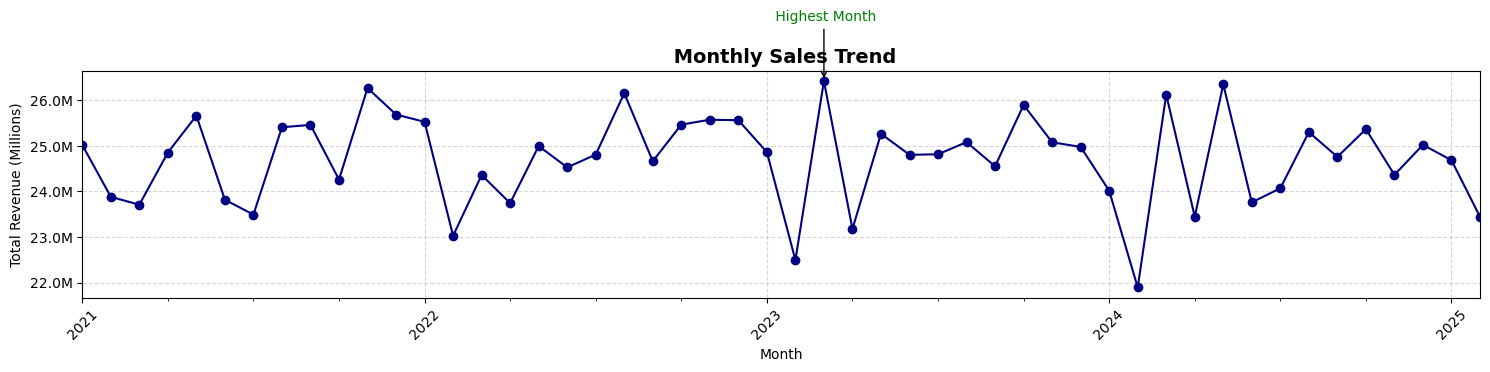

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 

# 1. Convert 'order_date' to monthly period 
df['order_month'] = df['order_date'].dt.to_period('M')

# 2. Group by month and sum the revenue
monthly_sales = df.groupby('order_month')['revenue'].sum()

# 3. Create the plot
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker='o', color='navy', linestyle='-')

# 4. Format Y-axis to show revenue in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Titles and labels
plt.title(' Monthly Sales Trend', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate X-axis labels
plt.xticks(rotation=45)

# 7. Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.5)

# 8. Annotate peak month
max_month = monthly_sales.idxmax()
max_value = monthly_sales.max()
plt.annotate(' Highest Month',
             xy=(max_month, max_value),
             xytext=(max_month, max_value * 1.05),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=10, ha='center', color='green')

# 9. Adjust layout and show the plot
plt.tight_layout()
plt.show()

### INSIGHTS ---
Sales consistently cycle between 24March
26M, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2024 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

### 🔹 2. Monthly Sales Trend (All Years)

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number


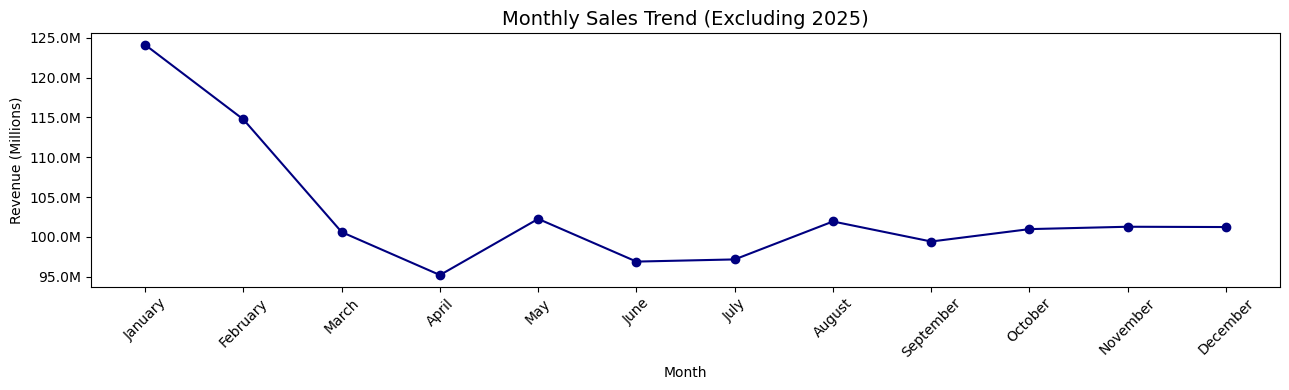

In [30]:
# 1. Filter out 2025 orders
df_ = df[df['order_date'].dt.year != 2025]  # keeps original df intact

# 2. Group by month number and month name, sum revenue, sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()  # ensures correct month order (Jan–Dec)
)

# 3. Set up plot
plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: Month names
    monthly_sales.values,                     # Y-axis: Revenue
    marker='o',
    color='navy'
)

# 4. Format y-axis labels to millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add titles and labels
plt.title('Monthly Sales Trend (Excluding 2025)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue (Millions)')

# 6. Tidy up x-axis
plt.xticks(rotation=45)

# 7. Final layout adjustments
plt.tight_layout()

# 8. Show plot
plt.show()

### INSIGHTS ---
Across all years, January begins strong with roughly 
99M, followed by a speed decline through April's slowpont(~95 M).

Sales rebound in May and August (≈102M) be foresetting to a plateauo 
f99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

### 🔹 3. Top 10 Products by Revenue (in Millions)

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

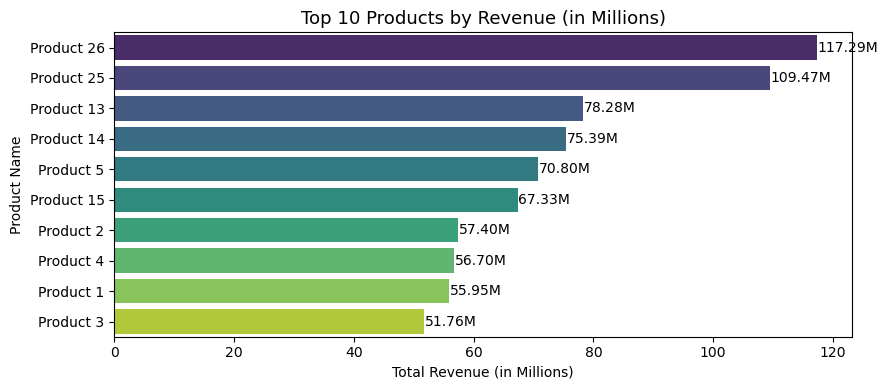

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate total revenue per product (in millions)
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# 2. Select top 10 products by revenue
top_prod = top_prod.nlargest(10)

# 3. Set plot size
plt.figure(figsize=(9, 4))

# 4. Plot horizontal bar chart
ax = sns.barplot(
    y=top_prod.index,
    x=top_prod.values,
    hue=top_prod.index,   # To satisfy future seaborn warning
    palette='viridis',
    dodge=False,
    legend=False
)

for i, value in enumerate(top_prod.values):
    ax.text(value + 0.1, i, f'{value:.2f}M', va='center')

# 6. Titles and labels
plt.title('Top 10 Products by Revenue (in Millions)', fontsize=13)
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')

plt.tight_layout()

# 8. Show plot
plt.show()

### INSIGHTS ---
Products 26 and 25 pull away at 118M and 110 M, with a sharp drop to 78M for products 13 and a tight mid–packet 68-$75M.

The bottom four cluster at 52-57 M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

### 🔹 4. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

Text(0, 0.5, 'Product Name')

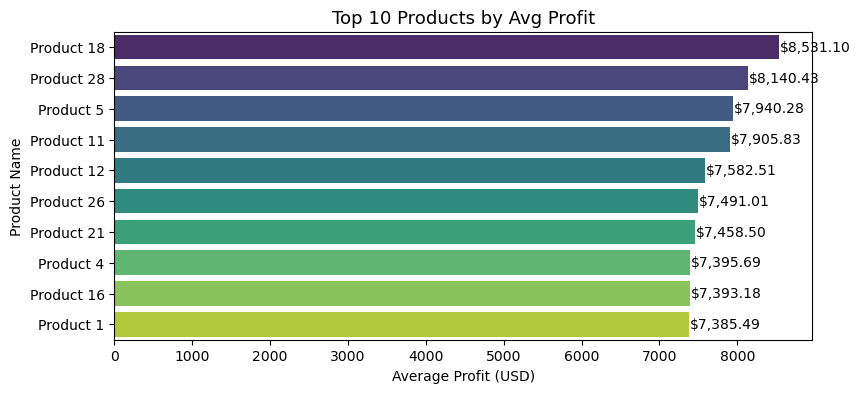

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average profit per product (top 10)
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

#  Set the figure size
plt.figure(figsize=(9, 4))

#  Create horizontal bar chart 
ax = sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    hue=top_margin.index,    
    palette='viridis',
    dodge=False,
    legend=False
)

#  Add data labels (rounded to 2 decimals)
for i, value in enumerate(top_margin.values):
    ax.text(value + 10, i, f"${value:,.2f}", va='center')  # 10 units right

#  Titles and axis labels
plt.title('Top 10 Products by Avg Profit', fontsize=13)
plt.xlabel('Average Profit (USD)')
plt.ylabel('Product Name')


### INSIGHTS ---
Products 18 and 28 lead with average profit margins of approximately. 0-8.3K,followed closely by Product5 and Product 11 around 7.9-8.0k.

Mid-tier performers like Products 12, 26, and 21 cluster in the 7.7-7.8K range, while the bottom tier(Product4,16 and 1) fall between 7.47.6K.

Focusing on margin optimization strategies from top performers may help elevate overall product profitability.


### 🔹 5. Sales by Channel (Pie Chart)
Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

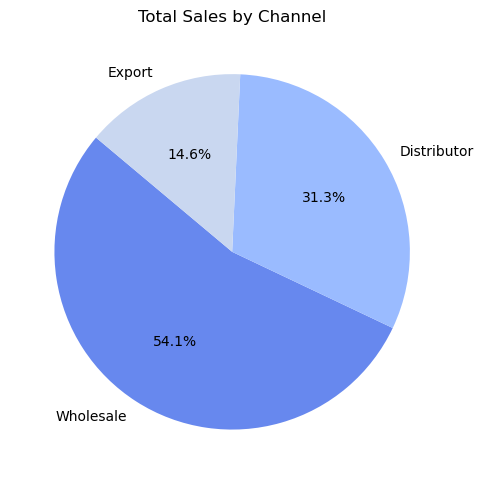

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Group total revenue by channel and sort
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

#  Set the figure size
plt.figure(figsize=(5, 5))

# Plot pie chart with % labels
plt.pie(
    chan_sales.values,                   # Revenue per channel
    labels=chan_sales.index,             # Channel names
    autopct='%1.1f%%',                   # Format: 1 decimal percentage
    startangle=140,                      # Rotate starting angle
    colors=sns.color_palette('coolwarm') # Apply custom color palette
)

#  Title for the chart
plt.title('Total Sales by Channel')

#  Optimize layout
plt.tight_layout()

#  Show the plot
plt.show()


### INSIGHTS ---
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

### 🔹 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

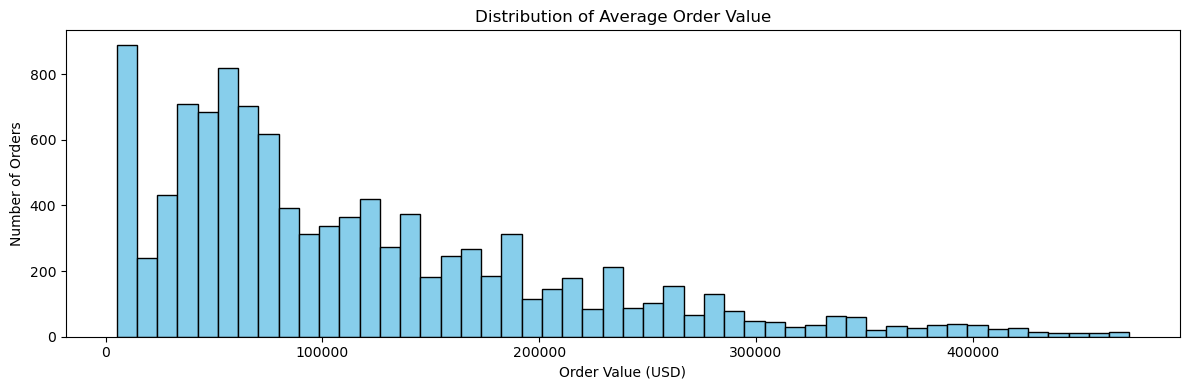

In [34]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               
    bins=50,           
    color='skyblue',   
    edgecolor='black'  
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between 20K and 120K and a pronounced mode around 50K-60 K.

A long tail of high-value transactions extends up toward 400k-500 K, but these large orders represent only a small share of total volume.

### 🔹 7. Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

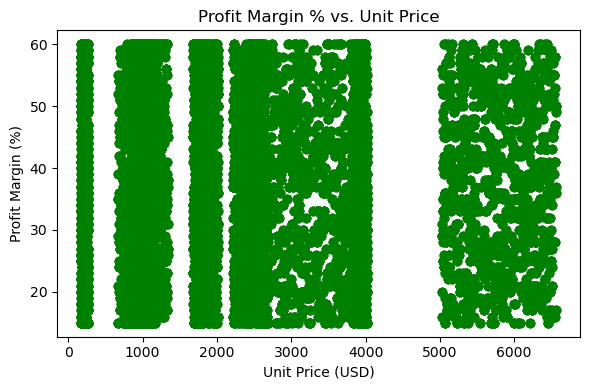

In [35]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()
     

### INSIGHTS ---
Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near 
6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

### 🔹 8. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

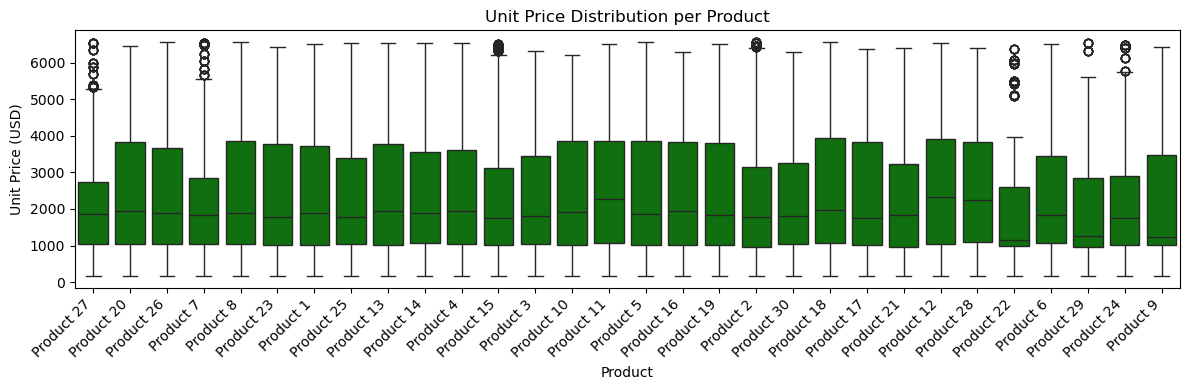

In [36]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()
     


### INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

### 🔹 9. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

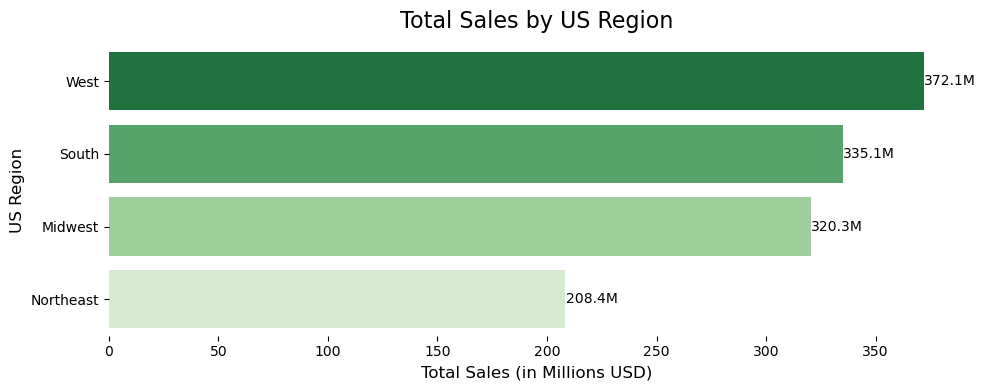

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False) / 1e6
)

region_sales_df = region_sales.reset_index()

# Plot
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    data=region_sales_df,
    x='revenue',
    y='us_region',
    hue='us_region',         
    palette='Greens_r',
    legend=False              
)


for i, value in enumerate(region_sales_df['revenue']):
    ax.text(value + 0.1, i, f'{value:.1f}M', va='center', fontsize=10)


plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### INSIGHTS —

West dominates with roughly $360 M in sales(~35 % of total), underscoring its market leadership.

South & Midwest each contribute over $320 M (~32 %), indicating strong, consistent demand across central regions.

Northeast trails at about $210 M (~20 %), signaling room for growth and targeted investment.

Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.

INSIGHTS ---
California leads by a wide margin, generating about $230 M in revenue and 7500 orders—more than twice the next-highest state.

Illinois, Florida, and Texas form a solid second tier, each posting $85–110 M in revenue with 3 600–4 600 orders.

New York and Indiana are mid-pack (≈54-55M, 2500orders), while Connecticut,Michigan and Massachuset 35–44 M with 1 600–2 100 orders.

The close alignment between revenue and order counts suggests similar average order values across states; to drive growth, focus on increasing order volume in the mid-tier and raising order size in lower-performing regions.

### 🔹 10. Total Sales by State 
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

States shaded by total sales (in millions USD) using a blue gradient
Legend on the right showing sales scale (M USD)
Hover tooltips display exact sales for each state
Map scoped to USA for clear regional context

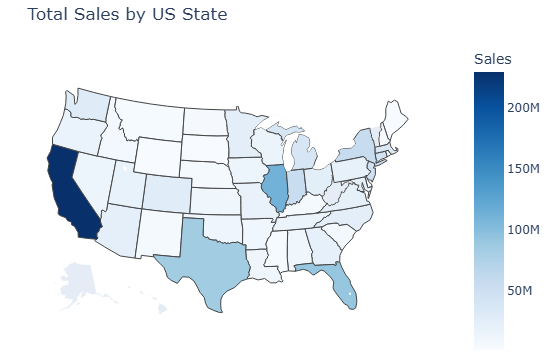

In [54]:
import pandas as pd
import plotly.express as px

# Step 1: Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

# Step 2: Mapping full state names to 2-letter abbreviations
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Step 3: Apply the mapping
state_sales['state_code'] = state_sales['state'].map(us_state_abbrev)

# Step 4: Drop rows where the state code could not be mapped (invalid or missing states)
state_sales = state_sales.dropna(subset=['state_code'])

# Step 5: Plotly choropleth map
fig = px.choropleth(
    state_sales,
    locations='state_code',        # Use 2-letter state codes
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m': 'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_name='state',
    hover_data={'state_code': False, 'revenue_m': ':.2f'}
)

# Step 6: Customize layout
fig.update_layout(
    title_text='Total Sales by US State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales',
        ticksuffix='M'
    )
)

fig.show()


### 🔹 11. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

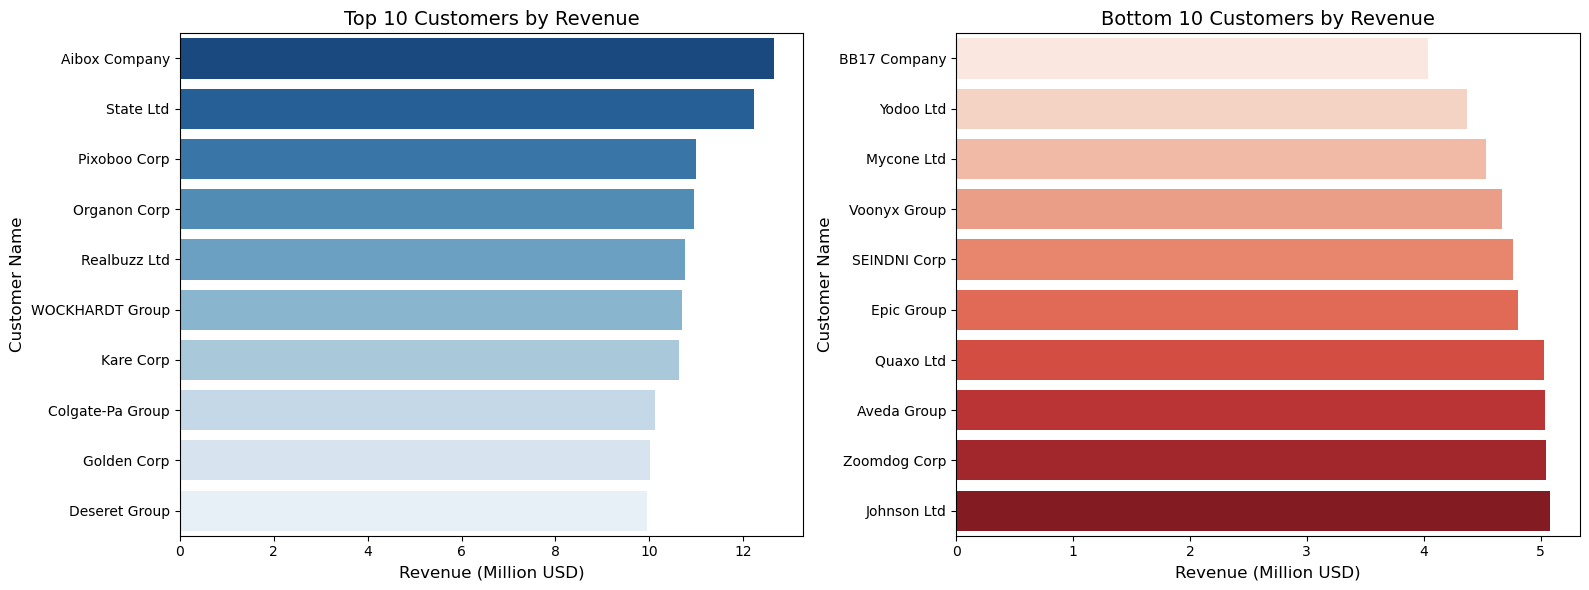

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress Seaborn future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#  Calculate top 10 customers by revenue
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Calculate bottom 10 customers by revenue
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 customers
sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    hue=top_rev.index,
    palette='Blues_r',
    ax=axes[0],
    legend=False
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

# Plot 2: Bottom 10 customers
sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    hue=bottom_rev.index,
    palette='Reds',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)

# Layout and show
plt.tight_layout()
plt.show()


### INSIGHTS ---

* Aibox Company tops the list with 12.5M, followed by closely by StateLTD(12.2M), while the 10th-ranked Deseret Group still contributes 9.9M- demonstraight 10-12M top tier.
* At the bottom, Johnson Ltd leads its group with 5.1M, down to BB17 company at 4.1M- roughly half the top customer's revenue.
* This steep drop from ~10M+ to 4–5 M highlights high revenue concentration among the top customers.
* Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


### 🔹 12. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

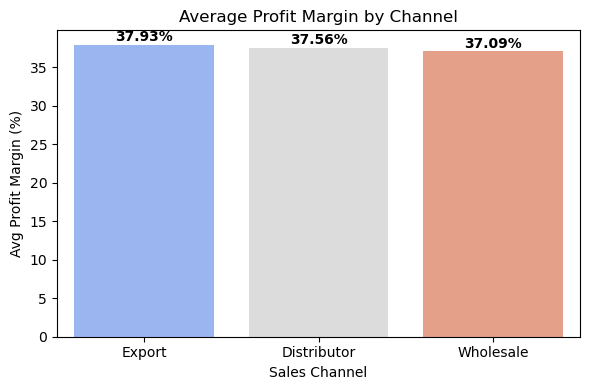

In [41]:
# Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# Set the figure size for clarity
plt.figure(figsize=(6, 4))

# Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

#  Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

#  Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

#  Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

### INSIGHTS ---
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

This uniformity implies well-controlled costs and pricing power everywhere.

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

### 🔹 13. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

In [43]:
print(df.columns.tolist())


['order_number', 'order_date', 'customer_name', 'channel', 'product_name', 'quantity', 'unit_price', 'revenue', 'cost', 'state', 'us_region', 'lat', 'lon', 'budget', 'total_cost', 'profit', 'profit_margin_pct', 'order_month_name', 'order_month_num', 'order_month']


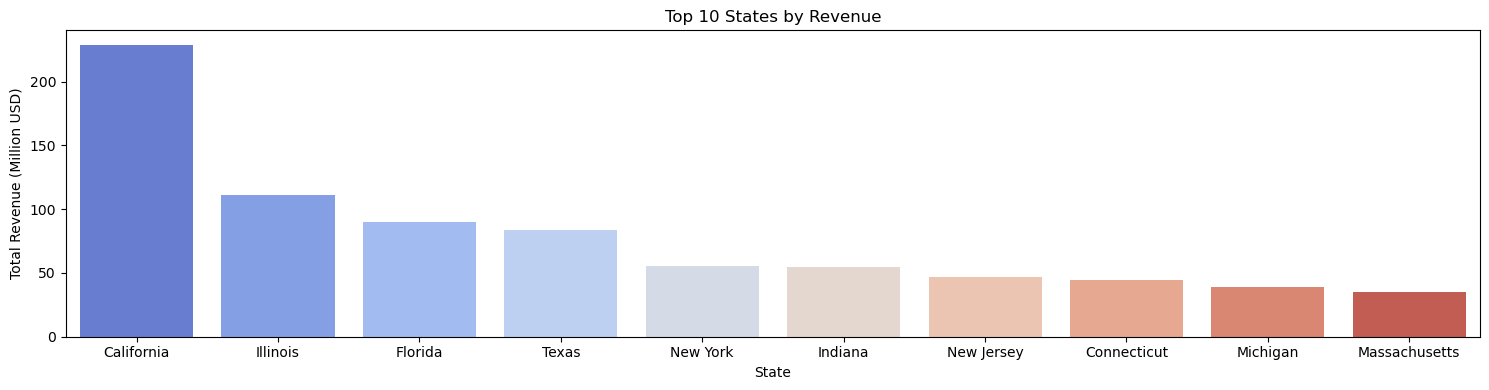

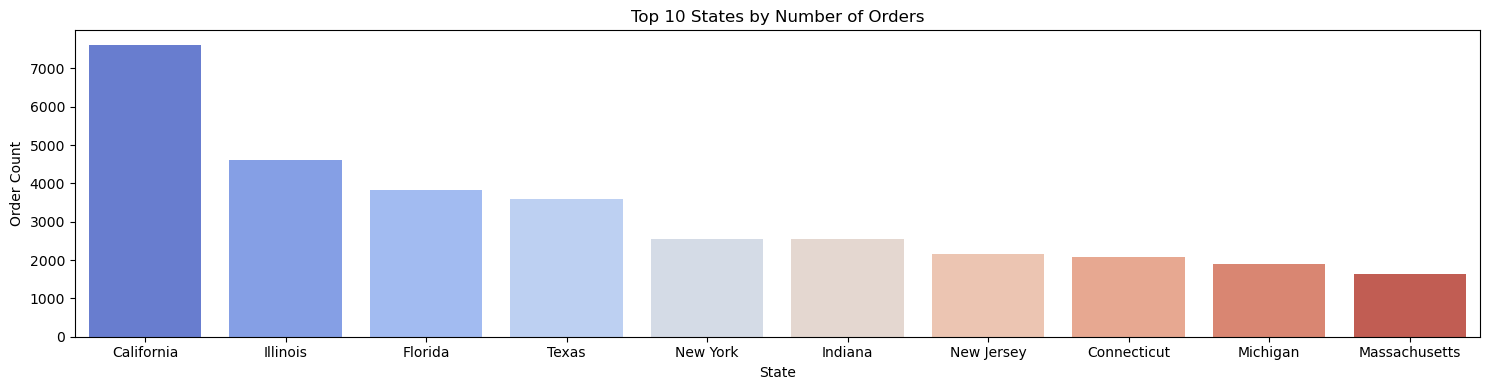

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

state_rev = df.groupby('state').agg(
    revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')
).sort_values('revenue', ascending=False).head(10)

# Plot 1: Top 10 states by revenue 
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


### 🔹 14. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

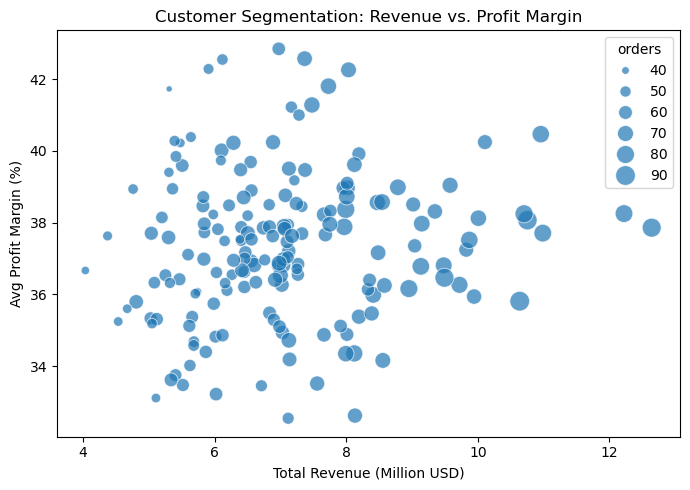

In [48]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',       
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

### INSIGHTS ---
Customers with >$10 M in revenue tend to sustain margins between
36–40%, indicating that scale does not significantly erode profitability.

Most customers cluster within the $6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier.

Customers below $6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.

Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

### 🔹 15. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

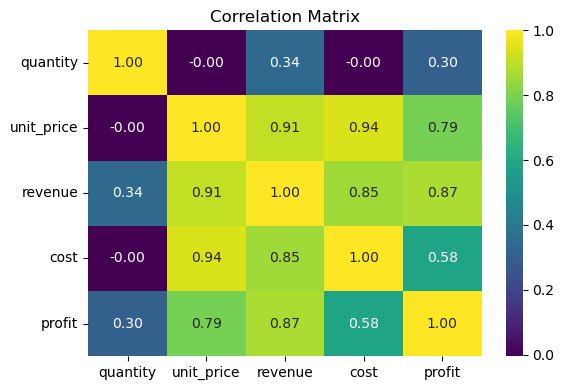

In [49]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           
    annot=True,     
    fmt=".2f",      
    cmap='viridis'  
)


plt.title('Correlation Matrix')


plt.tight_layout()


plt.show()

### INSIGHTS ---

Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.

Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.

Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.

Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

### Saving Pre-Processed Dataframe

In [50]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2021-01
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2021-01
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2021-01
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2021-01
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2025-02
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2025-02
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2025-02
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2025-02


In [52]:
df.to_csv('Sales_data.csv', index=False)


### 🔍 Key Insights

#### Monthly Revenue Cycle:
Revenue stays stable between ≈23M-26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

#### Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

#### Top Products (Revenue):
Product 26: 118M; Product25: 110; Product13. 78M. Mid-tier:68–75M; bottom performers: $52–57M.

#### Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

#### Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

#### Regional Performance:
California leads: ≈230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & ≈3500–4500 orders. NY/Indiana: ≈
54M & 2000+ orders.

### 💡 Recommendations
Outlier Strategy: Exclude or formalize bulk-order and promotional SKUs when calculating averages.
Margin Uplift: Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.
Export Growth: Invest in targeted overseas marketing and distributor partnerships.
Seasonal Planning: Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.
Dashboard Prep: Build aggregated tables for time series, channel mix, and product performance for Power BI.